In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
%matplotlib inline

In [6]:
sns.set_style('whitegrid')

# Basic data info 基本数据信息

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Survival Rate 存活率

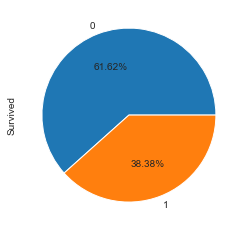

In [10]:
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

# Deal with nan values 处理缺失值

In [11]:
# Use mode to fill nan valuse in Embarked
# 使用众数填充港口的缺失值
train['Embarked'].fillna(value=train['Embarked'].dropna().mode(),inplace=True)

In [12]:
# Use U0 to replace nan valuse in Cabin as missing values may represent some info, such as person do not have a cabin
# 使用U0填补客舱的缺失值，因为缺失值可能代表一些信息，如乘客没有客舱
train['Cabin'].fillna(value='U0',inplace = True)

In [13]:
# Use Random Forest model to fill missing values in Age
# 使用随机森林模型填补年龄的缺失值
from sklearn.ensemble import RandomForestRegressor
age_df = train[['Age','Pclass','SibSp','Parch','Fare','Survived']]
age_df_notnull = age_df.loc[(age_df['Age'].notnull())]
age_df_isnull = age_df.loc[(age_df['Age'].isnull())]
age_X = age_df_notnull.iloc[:,1:]
age_y = age_df_notnull.iloc[:,0]
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1,max_depth=8)
RFR.fit(age_X,age_y)
predicted_age = RFR.predict(age_df_isnull.iloc[:,1:])

In [14]:
sum(train['Age'].isnull())

177

In [15]:
train['Age'][train['Age'].isnull()] = predicted_age

C:\Users\Junbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
sum(train['Age'].isnull())

0

### Data info after filling values 填充完成后的数据信息

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Relationship between survival rate and different features 各特征与存活率的关系 

## Sex 性别

In [19]:
train.groupby(['Sex','Survived'])['Survived'].count().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


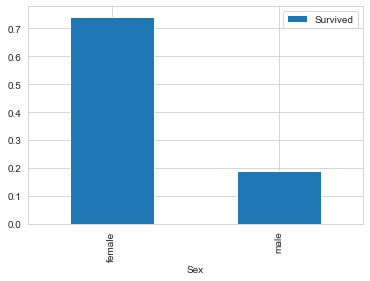

In [22]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

## Pclass (Ticket class) 船舱等级

In [23]:
train.groupby(['Pclass','Survived'])['Survived'].count().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


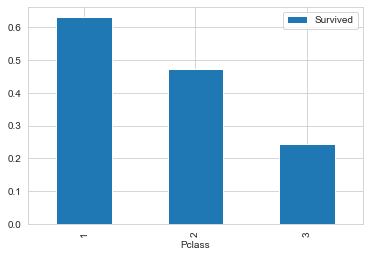

In [24]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

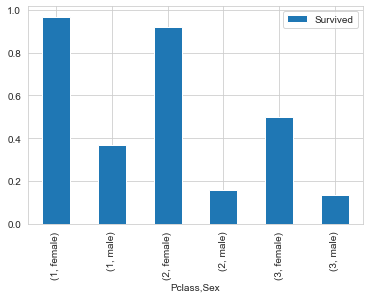

In [25]:
train[['Pclass','Survived','Sex']].groupby(['Pclass','Sex']).mean().plot.bar()

In [26]:
train.groupby(['Sex','Pclass','Survived'])['Survived'].count().unstack()

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

## Age 年龄

[]

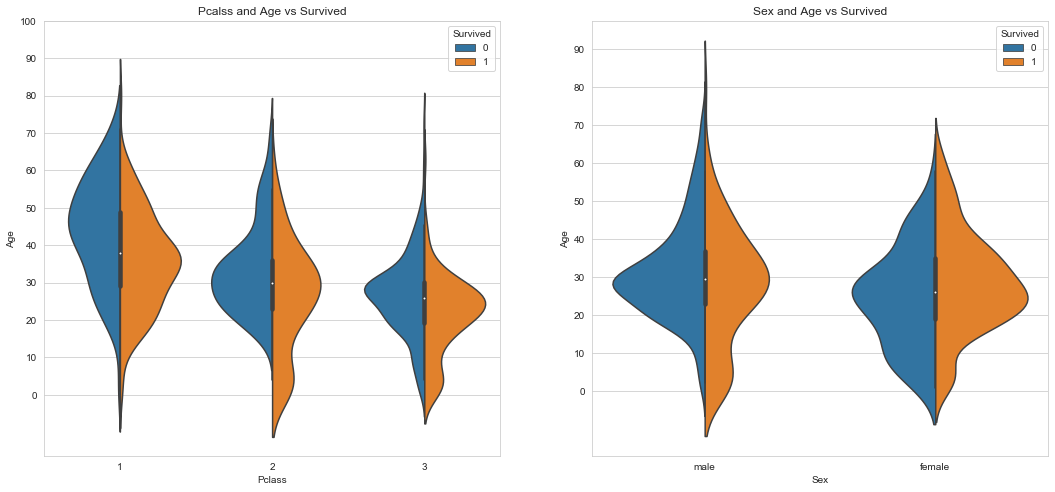

In [27]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived',data = train,split= True, ax=ax[0])
ax[0].set_title('Pcalss and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=train, split=True, ax= ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.plot()

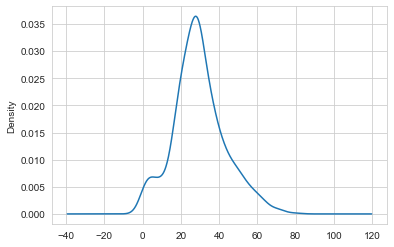

In [28]:
train['Age'].plot(kind='density')

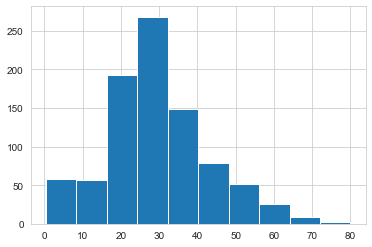

In [29]:
train['Age'].hist()

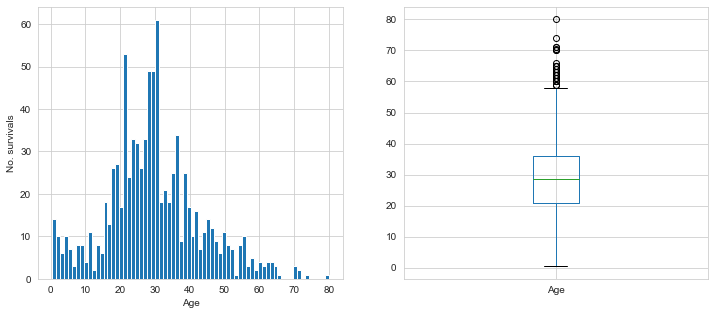

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('No. survivals')

plt.subplot(122)
train.boxplot(column='Age')
plt.show()

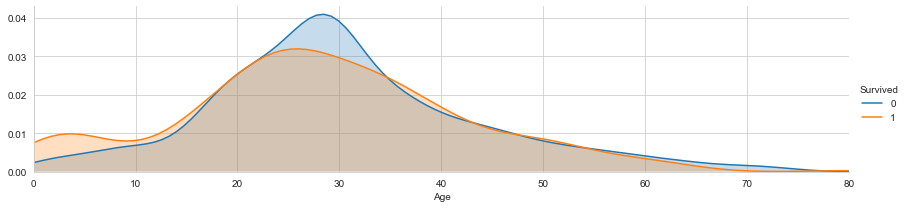

In [31]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

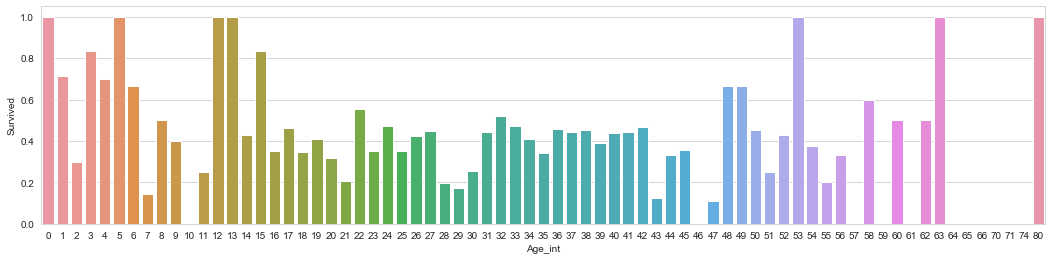

In [32]:
# Survival rates in different ages 各年龄的存活率
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train['Age_int'] = train['Age'].astype(int)
average_age = train[['Age_int','Survived']].groupby(['Age_int'],as_index = False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [33]:
average_age

,Age_int,Survived
0,0,1.000000
1,1,0.714286
2,2,0.300000
3,3,0.833333
4,4,0.700000
...,...,...
66,66,0.000000
67,70,0.000000
68,71,0.000000
69,74,0.000000


In [34]:
train['Age'].describe()

count    891.000000
mean      29.616551
std       13.597467
min        0.420000
25%       21.000000
50%       28.564470
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
# Divide passengers into four groups: Children, Youth, Adult and Ederly
# 按照年龄，将乘客划分为儿童、少年、成年和老年，分析四个群体的生还情况
bins = [0,12,18,65,100]
train['Age_group'] = pd.cut(train['Age'],bins)
by_age = train.groupby(['Age_group'])['Survived'].mean()
by_age

Age_group
(0, 12]      0.512195
(12, 18]     0.444444
(18, 65]     0.366255
(65, 100]    0.125000
Name: Survived, dtype: float64

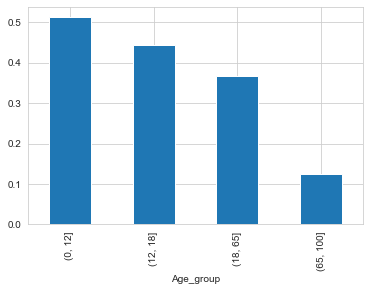

In [36]:
by_age.plot(kind='bar')

## Title 称呼

In [37]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False) 
pd.crosstab(train['Title'],train['Sex']) 

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


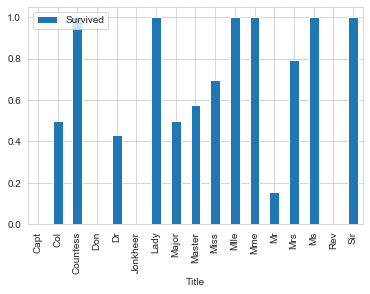

In [38]:
train[['Title','Survived']].groupby(['Title']).mean().plot.bar()

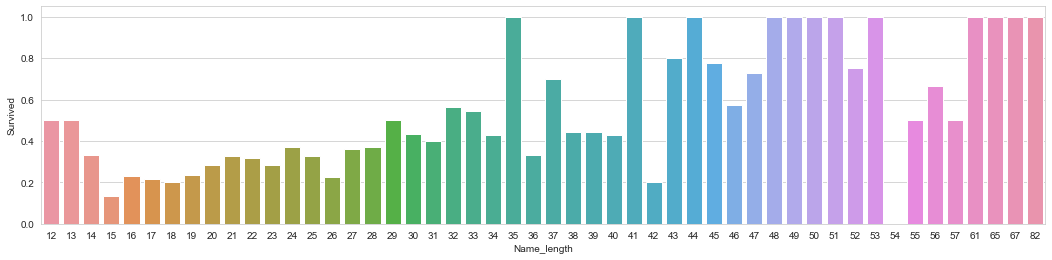

In [39]:
# Length of names 名字长度
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train['Name_length'] = train['Name'].apply(len)
name_length = train[['Name_length','Survived']].groupby(['Name_length'],as_index=False)['Survived'].mean()
sns.barplot(x='Name_length',y='Survived',data=name_length)

## Have brothers or Sisters? 有无兄弟姐妹

In [40]:
sibsp_df = train[train['SibSp'] != 0]
no_sibsp_df = train[train['SibSp'] == 0]

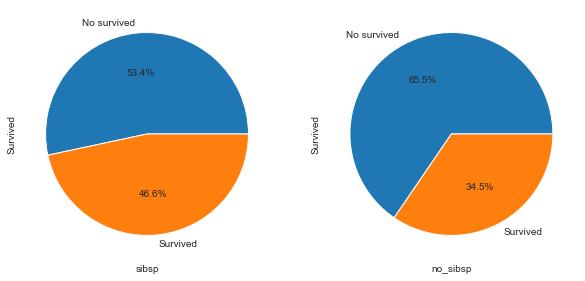

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No survived','Survived'],autopct='%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No survived','Survived'],autopct='%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

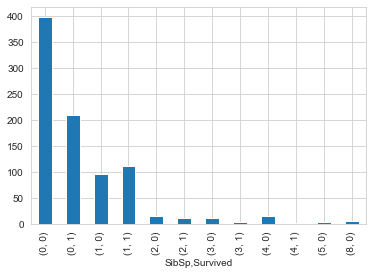

In [42]:
train.groupby(['SibSp','Survived'])['Survived'].count().plot.bar()

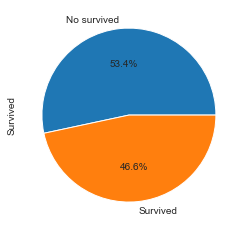

In [43]:
sibsp_df.groupby(['Survived'])['Survived'].count().plot.pie(labels=['No survived','Survived'],autopct='%1.1f%%')

## Have parents or children? 有无父母或子女

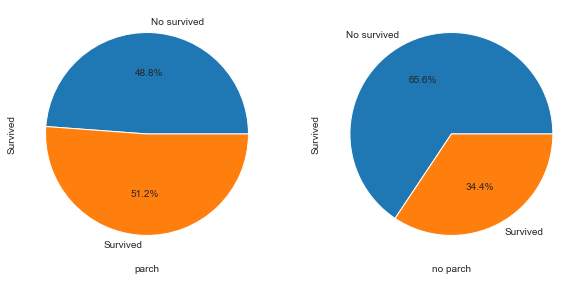

In [44]:
parch_df = train[train['Parch'] != 0]
no_parch_df = train[train['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df.groupby('Survived')['Survived'].count().plot.pie(labels=['No survived','Survived'],autopct='%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df.groupby('Survived')['Survived'].count().plot.pie(labels=['No survived','Survived'],autopct='%1.1f%%')
plt.xlabel('no parch')

plt.show()

## No. of families 亲友人数

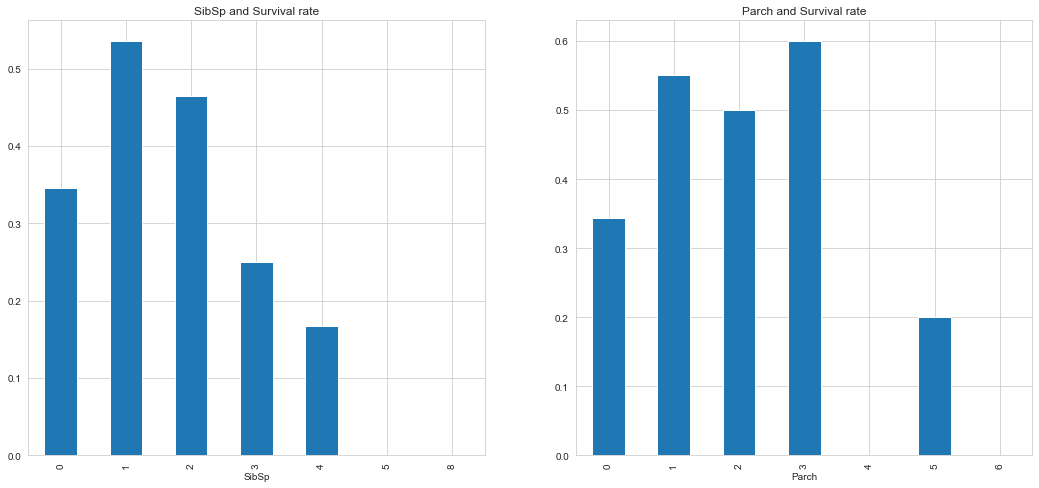

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(121)
train.groupby('SibSp')['Survived'].mean().plot.bar()
plt.title('SibSp and Survival rate')

plt.subplot(122)
train.groupby('Parch')['Survived'].mean().plot.bar()
plt.title('Parch and Survival rate')

plt.show()

Text(0.5, 1.0, 'Family size and survival rate')

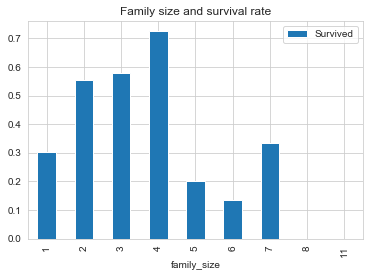

In [46]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1
train.groupby('family_size')['Survived'].mean().plot.bar()
plt.legend()
plt.title('Family size and survival rate')

## Fare 票价

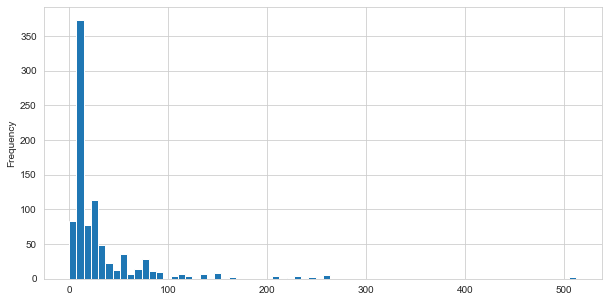

In [47]:
plt.figure(figsize=(10,5))
train['Fare'].plot.hist(bins=70)

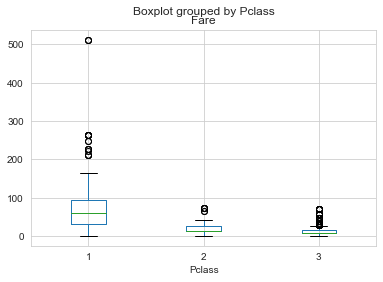

In [48]:
train.boxplot(column='Fare',by='Pclass')
plt.show()

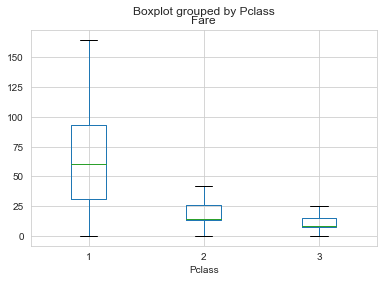

In [50]:
train.boxplot(column='Fare',by='Pclass',showfliers=False) 
plt.show()

In [51]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

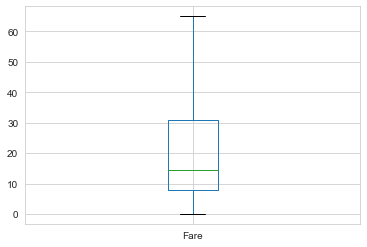

In [52]:
train.boxplot(column='Fare',showfliers=False)

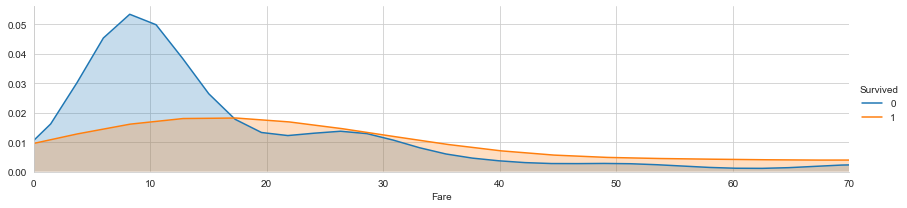

In [53]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,70))
facet.add_legend()

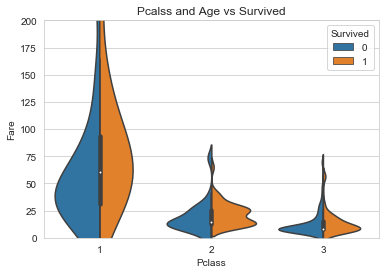

In [54]:
sns.violinplot('Pclass','Fare',hue='Survived',data = train,split= True)
plt.title('Pcalss and Age vs Survived')
plt.ylim(0,200)
plt.show()

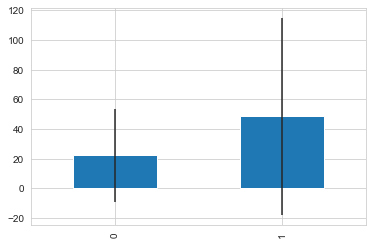

In [55]:
# Average fare between survived and dead passengers 幸存者与未幸存者的平均票价
fare_not_survived = train['Fare'][train['Survived'] == 0]
fare_survived = train['Fare'][train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_fare.plot(yerr=std_fare,kind='bar',legend=False) # yerr: error bars

## Cabin 船舱类型
Because there are too many missing values in Cabin (only 204 out of 891 are known), it is difficult to analyze the relationship between cabin and surviving rate. This feature could be dropped.  
由于船舱缺失值实在太多，有效值仅有204各，很难分析出不同船舱和存活的关系，所以在做特征工程的时候可以直接将该特征丢弃。

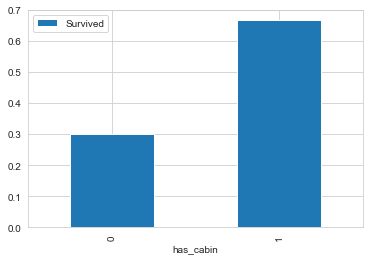

In [56]:
train['has_cabin'] = train['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train.groupby('has_cabin')['Survived'].mean().plot.bar(legend=True)

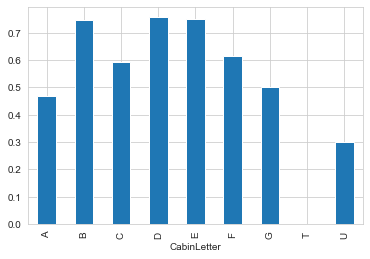

In [57]:
import re
train['CabinLetter'] = train['Cabin'].apply(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train.groupby('CabinLetter')['Survived'].mean().plot.bar()

## Embarkment 港口

Text(0.5, 1.0, 'Embarked and Survived')

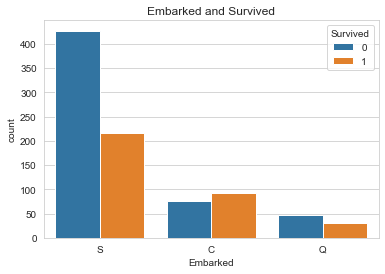

In [58]:
sns.countplot('Embarked',hue='Survived',data=train)
plt.title('Embarked and Survived')

C:\Users\Junbo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Junbo\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


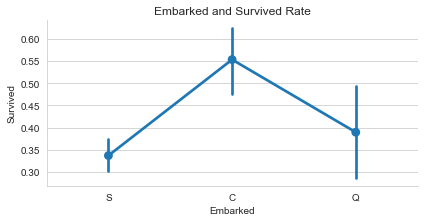

In [59]:
sns.factorplot('Embarked','Survived',data=train,size=3,aspect=2)
plt.title('Embarked and Survived Rate')
plt.show()

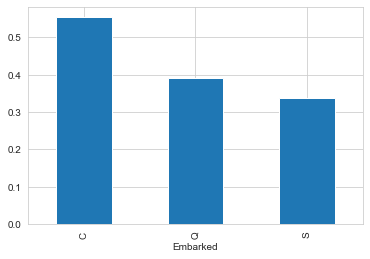

In [60]:
train.groupby('Embarked')['Survived'].mean().plot.bar()